<a href="https://colab.research.google.com/github/PaletteofDesign/project_2_part_2/blob/main/project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
# Loading data
f = '/content/creditcard.csv'
fraud_data = pd.read_csv(f)
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# Evaluating data
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128821.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000,128820.000000
mean,49336.332919,-0.249744,0.000916,0.675443,0.148242,-0.283905,0.082698,-0.116339,0.062151,-0.088806,-0.015430,0.219033,0.000600,-0.012927,0.034444,0.214593,-0.006016,0.048307,-0.089157,-0.020326,0.042462,-0.037040,-0.116116,-0.034347,0.011949,0.130182,0.025990,0.000309,0.002180,92.957430,0.002026
std,19835.452017,1.827108,1.623536,1.279349,1.328908,1.318513,1.286975,1.177426,1.213886,1.092654,1.051902,1.052331,1.042331,1.008100,0.930340,0.928554,0.884236,0.898904,0.837516,0.810673,0.730826,0.724081,0.636462,0.605542,0.594823,0.438585,0.491368,0.393115,0.313077,251.531566,0.044967
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36686.000000,-1.018878,-0.578627,0.171589,-0.706709,-0.904555,-0.658506,-0.602705,-0.133052,-0.714779,-0.484611,-0.542419,-0.403608,-0.675158,-0.344148,-0.327739,-0.476362,-0.407425,-0.556709,-0.510732,-0.169248,-0.225684,-0.544795,-0.172853,-0.324408,-0.135906,-0.324451,-0.060633,-0.004177,6.480000,0.000000
50%,51135.000000,-0.262776,0.094615,0.750314,0.176410,-0.315833,-0.170887,-0.065428,0.078587,-0.149362,-0.093706,0.134792,0.148853,-0.017902,0.062655,0.326046,0.074097,-0.014703,-0.087872,-0.023485,-0.026084,-0.059204,-0.093726,-0.046243,0.068501,0.166809,-0.064829,0.011257,0.023580,24.950000,0.000000
75%,65852.000000,1.156873,0.764179,1.368481,1.004736,0.239278,0.469984,0.410077,0.371213,0.491574,0.433457,1.038451,0.639690,0.651212,0.463240,0.884483,0.536298,0.440222,0.385788,0.476591,0.166288,0.115816,0.303344,0.082950,0.408842,0.418398,0.290970,0.085342,0.077376,83.450000,0.000000
max,78852.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
# Evaluating data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128821 entries, 0 to 128820
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    128821 non-null  int64  
 1   V1      128821 non-null  float64
 2   V2      128821 non-null  float64
 3   V3      128821 non-null  float64
 4   V4      128821 non-null  float64
 5   V5      128821 non-null  float64
 6   V6      128821 non-null  float64
 7   V7      128821 non-null  float64
 8   V8      128821 non-null  float64
 9   V9      128821 non-null  float64
 10  V10     128821 non-null  float64
 11  V11     128821 non-null  float64
 12  V12     128821 non-null  float64
 13  V13     128821 non-null  float64
 14  V14     128821 non-null  float64
 15  V15     128821 non-null  float64
 16  V16     128820 non-null  float64
 17  V17     128820 non-null  float64
 18  V18     128820 non-null  float64
 19  V19     128820 non-null  float64
 20  V20     128820 non-null  float64
 21  V21     12

In [6]:
# Checking for null values
fraud_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# Evaluating null values
fraud_data[fraud_data['Amount'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
128820,78852,-0.772608,0.88671,0.699519,1.757457,-0.504902,-0.963725,0.176063,0.15652,-0.654364,0.125472,-0.246172,0.064971,-0.003498,0.675742,1.60159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Evaluating null values
fraud_data[fraud_data['Class'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
128820,78852,-0.772608,0.88671,0.699519,1.757457,-0.504902,-0.963725,0.176063,0.15652,-0.654364,0.125472,-0.246172,0.064971,-0.003498,0.675742,1.60159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Evaluating null values
fraud_data[fraud_data['V28'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
128820,78852,-0.772608,0.88671,0.699519,1.757457,-0.504902,-0.963725,0.176063,0.15652,-0.654364,0.125472,-0.246172,0.064971,-0.003498,0.675742,1.60159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Removing null values from data
fraud_data.dropna(inplace=True)

In [11]:
# Checking to make sure null data removed
fraud_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Turning class into an int to remove decimal
fraud_data['Class'] = fraud_data['Class'].astype(int)
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128820 entries, 0 to 128819
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    128820 non-null  int64  
 1   V1      128820 non-null  float64
 2   V2      128820 non-null  float64
 3   V3      128820 non-null  float64
 4   V4      128820 non-null  float64
 5   V5      128820 non-null  float64
 6   V6      128820 non-null  float64
 7   V7      128820 non-null  float64
 8   V8      128820 non-null  float64
 9   V9      128820 non-null  float64
 10  V10     128820 non-null  float64
 11  V11     128820 non-null  float64
 12  V12     128820 non-null  float64
 13  V13     128820 non-null  float64
 14  V14     128820 non-null  float64
 15  V15     128820 non-null  float64
 16  V16     128820 non-null  float64
 17  V17     128820 non-null  float64
 18  V18     128820 non-null  float64
 19  V19     128820 non-null  float64
 20  V20     128820 non-null  float64
 21  V21     12

In [13]:
# Checking shape of data
fraud_data.shape

(128820, 31)

In [14]:
# Checking for duplicated data
fraud_data.duplicated().sum()


489

In [15]:
fraud_data.drop_duplicates(keep='first', inplace=True)

In [16]:
# Checking the balance of the data. The data is imbalanced. 
fraud_data['Class'].value_counts()

0    128075
1       256
Name: Class, dtype: int64

In [17]:
fraud_data[['Amount','Class']].loc[fraud_data['Class']==0]['Amount'].describe()

count    128075.000000
mean         93.032941
std         251.876562
min           0.000000
25%           6.500000
50%          24.950000
75%          83.500000
max       19656.530000
Name: Amount, dtype: float64

In [18]:
fraud_data[['Amount','Class']].loc[fraud_data['Class']==1]['Amount'].describe()

count     256.000000
mean      118.939062
std       248.165218
min         0.000000
25%         1.000000
50%        13.385000
75%       101.500000
max      1809.680000
Name: Amount, dtype: float64

In [19]:
fraud = fraud_data[fraud_data['Class'] == 1]
no_fraud = fraud_data[fraud_data['Class'] == 0]
print('Fraud Cases: {}'.format(len(fraud)))
print('Non-Fraud Cases: {}'.format(len(no_fraud)))

Fraud Cases: 256
Non-Fraud Cases: 128075


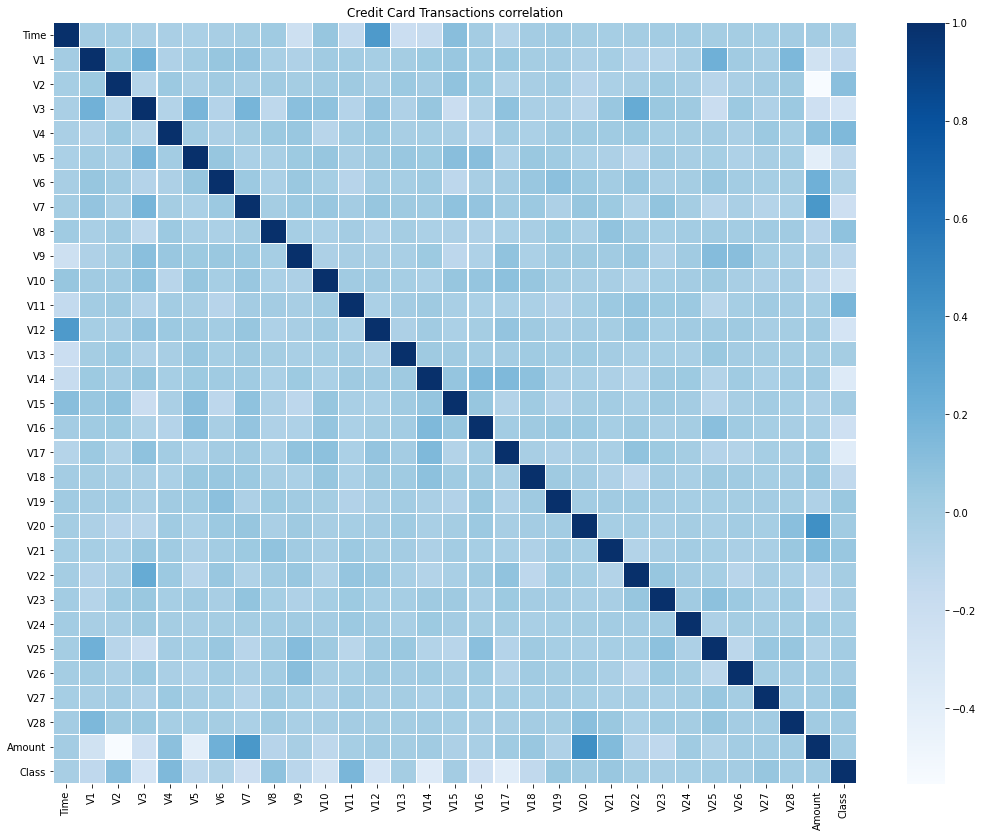

In [20]:
plt.figure(figsize = (18,14))
sns.heatmap(fraud_data.corr(), linewidths=.1, cmap='Blues')
plt.title('Credit Card Transactions correlation');

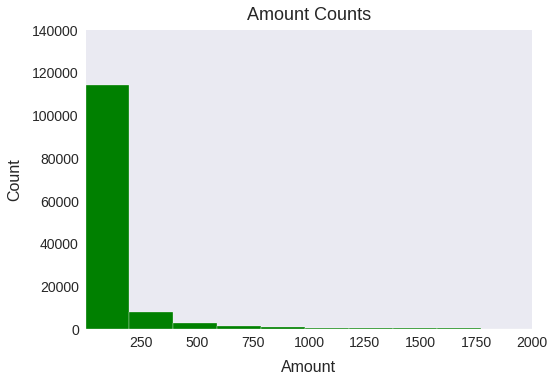

In [21]:
# Histogram to visually evaluate age
plt.style.use('seaborn')
plt.hist(fraud_data['Amount'], edgecolor='white', color='green', bins=100)
plt.grid(False)
plt.xlabel('Amount', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1,2000)
plt.ylim(0,140000)
plt.title('Amount Counts', fontsize=18, pad=10);

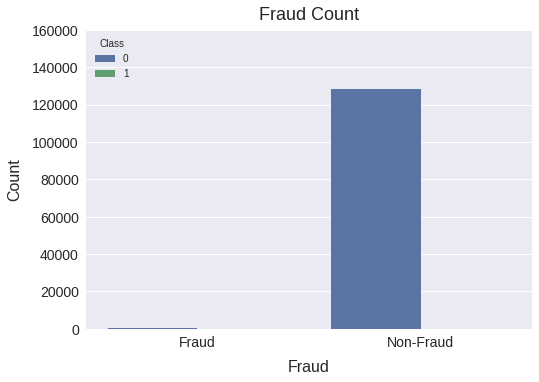

In [22]:
fig, ax = plt.subplots()
count = fraud_data['Class'].value_counts()
sns.barplot(data=fraud_data, x=count, y=count, hue='Class')
ax.set_xticklabels(['Fraud', 'Non-Fraud'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,160000)
plt.title('Fraud Count', fontsize=18, pad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)
plt.xlabel('Fraud', fontsize=16, labelpad=10);

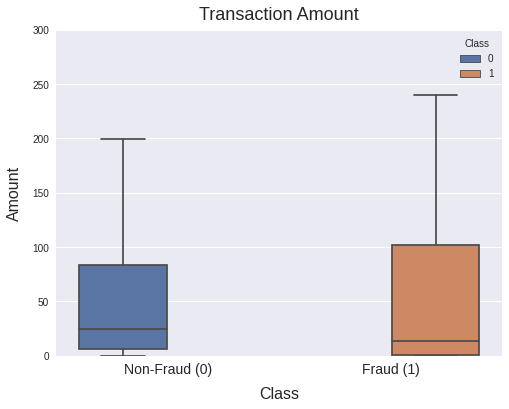

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="Class", y="Amount", hue="Class", data=fraud_data, palette='deep', showfliers=False)
plt.title('Transaction Amount', fontsize=18, pad=10)
plt.ylabel('Amount', fontsize=16, labelpad=10)
plt.xlabel('Class', fontsize=16, labelpad=10)
plt.ylim(0,300)
ax.set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'], fontsize=14);

In [24]:
#fraud_data['Hour'] = fraud_data['Time'].apply(lambda x: np.floor(x / 3600))

In [25]:
f_mask = fraud_data['Class']==1
fraud_data[f_mask]['Class'].value_counts()

1    256
Name: Class, dtype: int64

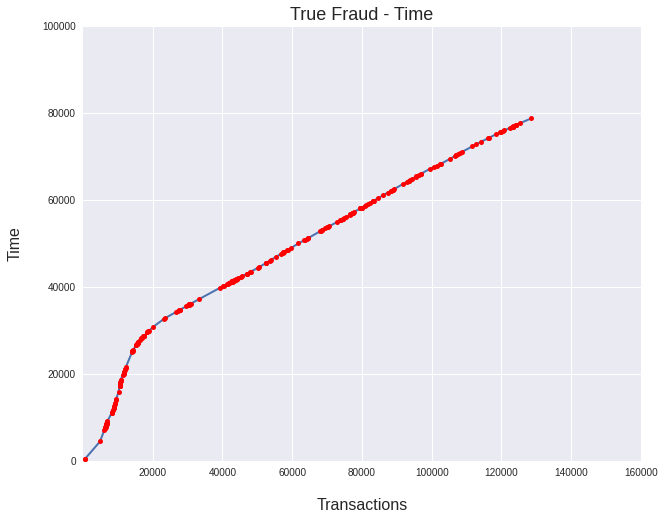

In [26]:
plt.figure(figsize=(10,8))
plt.plot(fraud_data[f_mask]['Time'], marker='.', markersize=10.0, lw=2, markerfacecolor='red');
plt.grid(True)
plt.ylim(0,100000)
plt.xlim(1,160000)
plt.title('True Fraud - Time', fontsize=18)
plt.ylabel('Time', fontsize=16, labelpad=20)
plt.xlabel('Transactions', fontsize=16, labelpad=20);

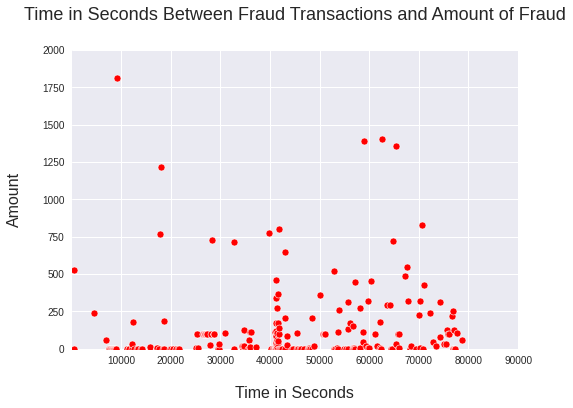

In [27]:
sns.scatterplot(x='Time', y='Amount', data=fraud_data[f_mask], color='red')
plt.ylabel('Amount', fontsize=16, labelpad=20)
plt.xlabel('Time in Seconds', fontsize=16, labelpad=20)
plt.title('Time in Seconds Between Fraud Transactions and Amount of Fraud', fontsize=18, pad=30)
plt.ylim(0,2000)
plt.xlim(1,90000);